You will be asked to perform some analyses on some macroeconomic data. The data files for the exercise are attached in Excel format. All data are extracted from the ECOS of the BOK (https://ecos.bok.or.kr). All the data are of monthly frequency. The contents of the data files are as follows. The first columns of all files are the months from 2000.1 to 2023.2. Some data are missing.

- BOKRates.xlsx: BOK base rate (한국은행 기준금리)
- GovBondYields.xlsx: Yields of treasury bonds (3 year) (3년 마기 국고채 수익률)
- CorporateBondYields.xlsx: Yields of corporate bonds (3 year, AA-), Yields of corporate bonds (3 year, BBB-)
- KOSPI_Index.xlsx: KOSPI Index (Monthly average, 1980.01 = 100)
- CurrentAccount: Balance of goods (상품수지)), Balance of services (서비스수지), Balance of primary income (본원소득수지), Balance of secondary income (이전소득수지), unit = million USD
- ExchangeRates: Won per one US dollar, Won per 100 Japanese Yen
- ForeignReserves: International reserves (외환보유고), unit = 1000 USD
- PriceIndexes: Consumer price index (소비자물가지수), House price index (주택매매가격지수)), House jeonse price index (주택전세가격지수)

You will need the following imports.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline


## Q1. Import Data from the Excel files.

The data files do not have the names of variables in them. They only have dates (on the first column) and a bunch of numbers. You'd better make up the names for the variables to import, then read in the data with the names. It is desirable that the variables names refect the contents. 

In [2]:
# your code here
기준금리 = pd.read_excel("BOKRates.xlsx", header = None, names = ['Month','기준금리'])
국고채수익률 = pd.read_excel("GovBondYields.xlsx", header = None, names = ['Month','3년만기국고채수익률'])
회사채수익률 = pd.read_excel("CorporateBondYields.xlsx", header = None, names = ['Month','AA-','BBB-'])
코스피 = pd.read_excel("KOSPI_Index.xlsx", header = None, names = ['Month','코스피'])
경상수지 = pd.read_excel("CurrentAccount.xlsx", header = None, names = ['Month','상품수지','서비스수지','본원소득수지','이전소득수지'])
환율 = pd.read_excel("ExchangeRates.xlsx", header = None, names = ['Month','대원화미달러','대원화엔'])
외환보유고 = pd.read_excel("ForeignReserves.xlsx", header = None, names = ['Month', '외환보유액'])
지수 = pd.read_excel("PriceIndexes.xlsx", header = None, names = ['Month','소비자물가지수','주택매매가격지수','주택전세가격지수'])


## Q2. Merge and delete dataframes


#### Q2-1. Merge all the separate dataframes that you loaded above into a large dataframe.


In [3]:
# your code here
large_df = pd.concat([기준금리,국고채수익률.iloc[:,1:],회사채수익률.iloc[:,1:],코스피.iloc[:,1:],경상수지.iloc[:,1:],환율.iloc[:,1:],외환보유고.iloc[:,1:],지수.iloc[:,1:]], axis=1)
large_df = large_df.reset_index(drop=True);large_df


,Month,기준금리,3년만기국고채수익률,AA-,BBB-,코스피,상품수지,서비스수지,본원소득수지,이전소득수지,대원화미달러,대원화엔,외환보유액,소비자물가지수,주택매매가격지수,주택전세가격지수
0,2000/01,4.75,9.280,10.250,NaN,NaN,2399.5,-355.6,-396.3,-4.4,1131.07,1074.52,76999820,62.456,38.995,37.418
1,2000/02,5.00,8.990,10.010,NaN,902.73,534.6,73.0,-391.1,42.2,1128.80,1030.93,79726833,62.647,39.161,38.501
2,2000/03,5.00,9.060,10.000,NaN,878.38,733.5,-35.4,-327.3,-28.7,1117.19,1048.11,83648210,62.962,39.327,39.368
3,2000/04,5.00,8.950,9.970,NaN,779.75,-39.3,-130.1,-472.8,-3.6,1109.76,1052.99,84612868,62.709,39.368,39.874
4,2000/05,5.00,8.960,9.910,NaN,720.77,1346.5,-185.3,-185.0,-13.6,1120.01,1036.50,86819839,62.393,39.327,39.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2022/10,3.00,4.235,5.436,11.288,2230.27,-2326.3,-727.3,2179.7,-57.4,1426.66,969.36,414005699,109.210,100.014,100.264
274,2022/11,3.25,3.895,5.487,11.331,2417.56,-1512.5,-813.3,1886.9,-152.3,1364.10,956.51,416104905,109.100,98.909,98.829
275,2022/12,3.25,3.630,5.302,11.173,2361.28,310.9,-563.0,2516.9,18.2,1296.22,959.12,423163664,109.280,97.894,97.279
276,2023/01,3.50,3.460,4.704,10.788,2362.36,-3390.4,-2513.3,6335.4,-161.5,1247.25,956.76,429967671,110.100,96.612,95.350


#### Q2-2. The dataframes that you loaded from excel files in Q1 will not be used any more. Delete them from memory (Do not delete Excel files on your computer!!!).

In [4]:
# your code here
del 기준금리,국고채수익률,회사채수익률,코스피,경상수지,환율,외환보유고,지수

## Q3. Convert data type and set index


#### Q3-1. Do the following

- Check with the data types of the variables. The data type of the first column (the months) must be currently `object`. 
- Convert the type of the first column into `pandas datetime`. You may refer to https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 


In [5]:
# your code here
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       278 non-null    object 
 1   기준금리        278 non-null    float64
 2   3년만기국고채수익률  278 non-null    float64
 3   AA-         278 non-null    float64
 4   BBB-        269 non-null    float64
 5   코스피         276 non-null    float64
 6   상품수지        277 non-null    float64
 7   서비스수지       277 non-null    float64
 8   본원소득수지      277 non-null    float64
 9   이전소득수지      277 non-null    float64
 10  대원화미달러      278 non-null    float64
 11  대원화엔        278 non-null    float64
 12  외환보유액       278 non-null    int64  
 13  소비자물가지수     278 non-null    float64
 14  주택매매가격지수    278 non-null    float64
 15  주택전세가격지수    278 non-null    float64
dtypes: float64(14), int64(1), object(1)
memory usage: 34.9+ KB


In [6]:
# your code here
large_df['Month'] = pd.to_datetime(large_df['Month'])

In [7]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       278 non-null    datetime64[ns]
 1   기준금리        278 non-null    float64       
 2   3년만기국고채수익률  278 non-null    float64       
 3   AA-         278 non-null    float64       
 4   BBB-        269 non-null    float64       
 5   코스피         276 non-null    float64       
 6   상품수지        277 non-null    float64       
 7   서비스수지       277 non-null    float64       
 8   본원소득수지      277 non-null    float64       
 9   이전소득수지      277 non-null    float64       
 10  대원화미달러      278 non-null    float64       
 11  대원화엔        278 non-null    float64       
 12  외환보유액       278 non-null    int64         
 13  소비자물가지수     278 non-null    float64       
 14  주택매매가격지수    278 non-null    float64       
 15  주택전세가격지수    278 non-null    float64       
dtypes: datetime64[ns](1), floa

#### Q3-2. Set the converted column as the index of the dataframe.

In [8]:
# your code here
large_df.set_index("Month", inplace=True)

## Q4. Create new variables and delete some exisitng variables

#### Q4-1. Create the following new variables (columns) using existing variables.

- Creadit spread: the difference in yields between corporate bonds with high risk and low risk
- Monthly percentage change in KOSPI index
- Current account: some of balances of goods, services, primary income and secondary income
- Monthly change in the foreign reserves
- YoY Inflation rate for consumer price index: percentage change in the consumer price index compared to the month in the previous year (전년동월대비 소지비물가지수 상승율)
- YoY Inflation rate for house price index: percentage change in the house price index compared to the month in the previous year (전년동월대비 주택매매가격지수 상승율)
- YoY Inflation rate for jeonse price index: percentage change in the jeonse price index compared to the month in the previous year (전년동월대비 주택전세가격지수 상승율)


In [9]:
# your code here
large_df['credit_spread']=large_df['BBB-'] - large_df['AA-']

change_rate_kospi=[np.nan]
for i in range(len(large_df)-1):
    change_rate_kospi.append((large_df['코스피'].iloc[i+1]-large_df['코스피'].iloc[i])/large_df['코스피'].iloc[i]*100)
large_df['change_rate_kospi']=change_rate_kospi

large_df['current_account'] = large_df['상품수지']+large_df['서비스수지']+large_df['본원소득수지']+large_df['이전소득수지']

change_foreign_reserves=[np.nan]
for i in range(len(large_df)-1):
    change_foreign_reserves.append((large_df['외환보유액'].iloc[i+1]-large_df['외환보유액'].iloc[i])/large_df['외환보유액'].iloc[i]*100)
large_df['change_foreign_reserves']=change_foreign_reserves

consumer_price_index = [np.nan]*12
for i in range(len(large_df)-12):
    consumer_price_index.append((large_df['소비자물가지수'][i+12]-large_df['소비자물가지수'][i])/large_df['소비자물가지수'][i]*100)
large_df['consumer_price_index'] = consumer_price_index

house_price_index = [np.nan]*12
for i in range(len(large_df)-12):
    house_price_index.append((large_df['주택매매가격지수'][i+12]-large_df['주택매매가격지수'][i])/large_df['주택매매가격지수'][i]*100)
large_df['house_price_index'] = house_price_index

jeonse_price_index = [np.nan]*12
for i in range(len(large_df)-12):
    jeonse_price_index.append((large_df['주택전세가격지수'][i+12]-large_df['주택전세가격지수'][i])/large_df['주택전세가격지수'][i]*100)
large_df['jeonse_price_index'] = jeonse_price_index


large_df



,기준금리,3년만기국고채수익률,AA-,BBB-,코스피,상품수지,서비스수지,본원소득수지,이전소득수지,대원화미달러,...,소비자물가지수,주택매매가격지수,주택전세가격지수,credit_spread,change_rate_kospi,current_account,change_foreign_reserves,consumer_price_index,house_price_index,jeonse_price_index
Month,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.75,9.280,10.250,NaN,NaN,2399.5,-355.6,-396.3,-4.4,1131.07,...,62.456,38.995,37.418,NaN,NaN,1643.2,NaN,NaN,NaN,NaN
2000-02-01,5.00,8.990,10.010,NaN,902.73,534.6,73.0,-391.1,42.2,1128.80,...,62.647,39.161,38.501,NaN,NaN,258.7,3.541584,NaN,NaN,NaN
2000-03-01,5.00,9.060,10.000,NaN,878.38,733.5,-35.4,-327.3,-28.7,1117.19,...,62.962,39.327,39.368,NaN,-2.697374,342.1,4.918516,NaN,NaN,NaN
2000-04-01,5.00,8.950,9.970,NaN,779.75,-39.3,-130.1,-472.8,-3.6,1109.76,...,62.709,39.368,39.874,NaN,-11.228625,-645.8,1.153232,NaN,NaN,NaN
2000-05-01,5.00,8.960,9.910,NaN,720.77,1346.5,-185.3,-185.0,-13.6,1120.01,...,62.393,39.327,39.910,NaN,-7.563963,962.6,2.608316,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,3.00,4.235,5.436,11.288,2230.27,-2326.3,-727.3,2179.7,-57.4,1426.66,...,109.210,100.014,100.264,5.852,-4.441436,-931.3,-0.662470,5.670053,1.909517,1.709289
2022-11-01,3.25,3.895,5.487,11.331,2417.56,-1512.5,-813.3,1886.9,-152.3,1364.10,...,109.100,98.909,98.829,5.844,8.397638,-591.2,0.507048,5.035140,-0.317464,-0.475323
2022-12-01,3.25,3.630,5.302,11.173,2361.28,310.9,-563.0,2516.9,18.2,1296.22,...,109.280,97.894,97.279,5.871,-2.327967,2283.0,1.696389,5.036524,-1.831127,-2.455679


#### Q4-2. Delete the following unnecssary variables and show summary statistics of the dataset.

- KOSPI index, consumer price index, house price index, house jeonse price index, foreign reserves

In [10]:
# your code here
large_df.drop(['코스피','소비자물가지수','주택매매가격지수','주택전세가격지수','외환보유액'], axis=1,inplace = True)
large_df.describe()


,기준금리,3년만기국고채수익률,AA-,BBB-,상품수지,서비스수지,본원소득수지,이전소득수지,대원화미달러,대원화엔,credit_spread,change_rate_kospi,current_account,change_foreign_reserves,consumer_price_index,house_price_index,jeonse_price_index
count,278.000000,278.000000,278.000000,269.000000,277.000000,277.000000,277.000000,277.000000,278.000000,278.000000,269.000000,275.000000,277.000000,277.000000,266.000000,266.000000,266.000000
mean,2.811151,3.571453,4.342701,9.260100,4508.821661,-950.124549,303.487726,-335.328881,1137.415863,1070.131511,5.095487,0.482095,3526.855957,0.632350,2.484966,4.388649,4.295722
std,1.377141,1.797362,2.001742,1.225677,3490.707489,862.154540,927.625774,232.817818,103.503146,169.091638,1.254986,5.112447,3397.964587,1.639997,1.412359,4.736939,5.023274
min,0.500000,0.826000,1.645000,7.720000,-3390.400000,-3952.400000,-1963.800000,-1432.100000,915.860000,755.570000,2.140000,-17.551866,-4327.200000,-11.440218,-0.426058,-4.349996,-6.236467
25%,1.500000,1.967250,2.404750,8.343000,1576.400000,-1357.800000,-301.700000,-467.400000,1086.005000,981.635000,4.080000,-2.220146,722.400000,-0.087986,1.340697,1.379696,0.528309
50%,2.750000,3.490000,4.250000,8.800000,4038.200000,-739.600000,53.900000,-334.400000,1132.520000,1036.875000,5.790000,0.816044,2786.100000,0.465857,2.425673,2.961146,3.890701
75%,4.000000,4.817500,5.497500,10.090000,7201.400000,-328.000000,759.000000,-217.500000,1186.417500,1104.620000,6.074000,3.632649,6313.200000,1.261003,3.440619,6.298260,6.600215
max,5.250000,9.280000,10.250000,12.620000,12440.400000,1108.000000,6335.400000,643.700000,1461.980000,1546.110000,6.408000,15.927923,13843.100000,7.967986,6.336789,17.676755,19.314590


## Q5. Count the number of observarions for the following


#### Q5-1. the number of periods when the BOK base rate was higher than its mean

In [11]:
# your code here
sum(large_df['기준금리']>large_df['기준금리'].mean())


132

#### Q5-2. the number of periods when the CIP inflation rate was higher than its mean

In [12]:
# your code here
sum(large_df['consumer_price_index']>large_df['consumer_price_index'].mean())

128

#### Q5-3. the number of periods when the house price inflation rate was higher than CPI inflation rate

In [14]:
# your code here
sum(large_df['house_price_index']>large_df['house_price_index'].mean())

99

#### Q5-4. the number of periods when the US Dollar was more valuable than the Japanse Yen

In [15]:
# your code here
sum(large_df['대원화미달러']>large_df['대원화엔'])

217

#### Q5-5. the number of periods when Korea ran a surplus in current account 

In [16]:
# your code here
sum(large_df['current_account']>0)

236

## Q6. Plot the following variables

- BOK base rate, government bond yields, corporate bond yields (AA-) in a graph
- Corporate bond yields (both AA- and BBB-) and the credit spread in a graph
- Current account and its components in a graph
- Current account and the monthly changes in foreign reserves (remark: The units of these two variables are different. Bear this in mind when you make the plot.)
- Exchange rates of USD and JPY in a graph
- Inflation rates of consumer price index, house price index, house jeonse price index in a graph

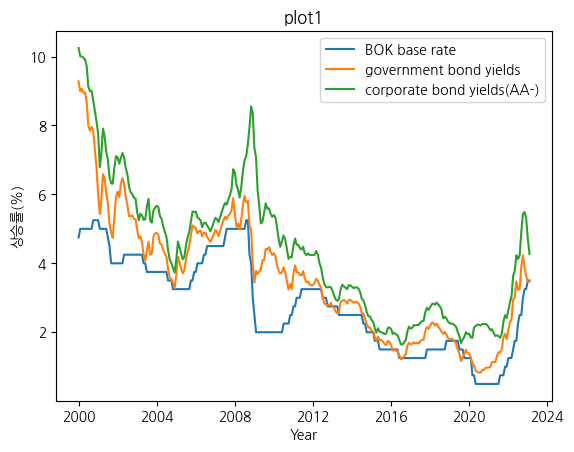

In [21]:
# your code here
plt.rcParams['font.family'] = 'NanumGothic'
plt.plot(large_df['기준금리'],label = 'BOK base rate')
plt.plot(large_df['3년만기국고채수익률'], label = 'government bond yields')
plt.plot(large_df['AA-'], label = 'corporate bond yields(AA-)')
plt.xlabel('Year')
plt.ylabel('상승률(%)')
plt.title("plot1")
plt.legend()
plt.show()

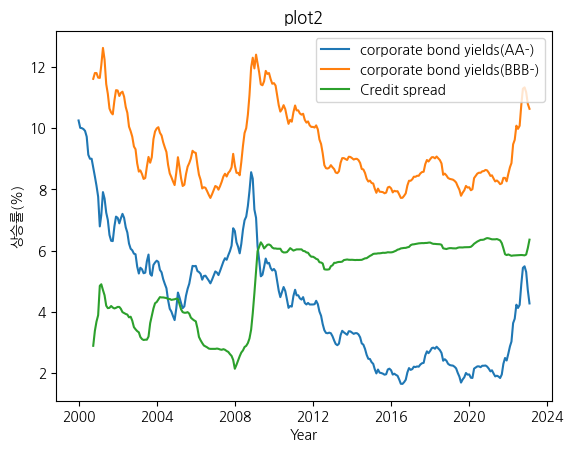

In [22]:
# your code here
plt.plot(large_df['AA-'], label = 'corporate bond yields(AA-)')
plt.plot(large_df['BBB-'], label = 'corporate bond yields(BBB-)')
plt.plot(large_df['credit_spread'], label = 'Credit spread')
plt.xlabel('Year')
plt.ylabel('상승률(%)')
plt.title("plot2")
plt.legend()
plt.show()

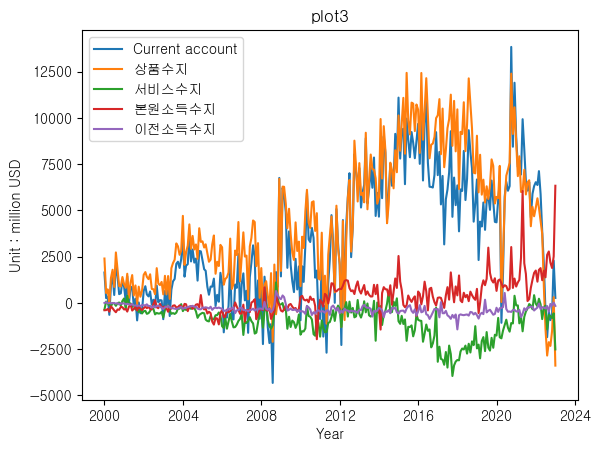

In [27]:
# your code here

# 다른 폰트를 사용하도록 Matplotlib에 지정(마이너스가 깨짐 문제해결)
plt.rcParams['font.family'] = 'Gulim'

plt.plot(large_df['current_account'], label = 'Current account')
plt.plot(large_df['상품수지'], label = '상품수지')
plt.plot(large_df['서비스수지'], label = '서비스수지')
plt.plot(large_df['본원소득수지'], label = '본원소득수지')
plt.plot(large_df['이전소득수지'], label = '이전소득수지')
plt.xlabel('Year')
plt.ylabel('Unit : million USD')
plt.title('plot3')
plt.legend()
plt.show()

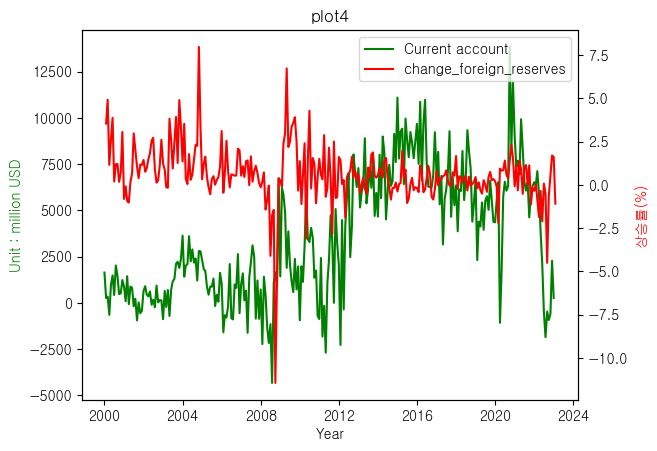

In [39]:
# your code here
# 그래프 생성
fig, ax1 = plt.subplots()

# 첫 번째 데이터를 왼쪽 축(ax1)에 그리기
ax1.plot(large_df['current_account'], 'green', label='Current account')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unit : million USD', color='green')

# 두 번째 데이터를 오른쪽 축(ax2)에 그리기
ax2 = ax1.twinx()
ax2.plot(large_df['change_foreign_reserves'], 'red', label='change_foreign_reserves')
ax2.set_ylabel('상승률(%)', color='red')

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('plot4')
plt.show()

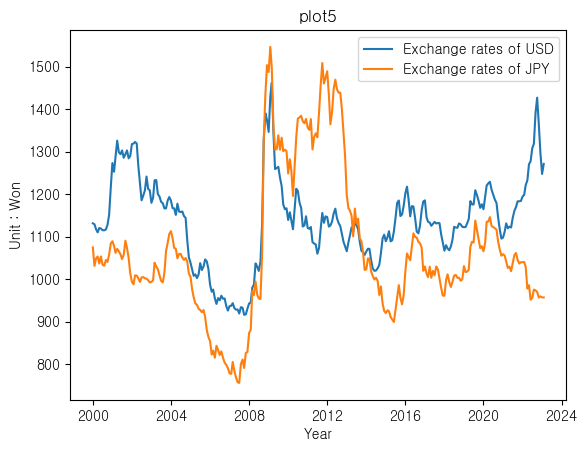

In [35]:
# your code here
plt.plot(large_df['대원화미달러'], label = 'Exchange rates of USD')
plt.plot(large_df['대원화엔'], label = 'Exchange rates of JPY')
plt.xlabel('Year')
plt.ylabel('Unit : Won')
plt.legend()
plt.title('plot5')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

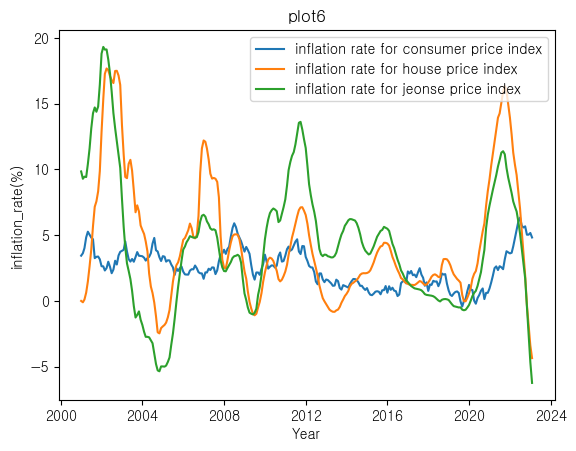

In [43]:
# your code here
plt.plot(large_df['consumer_price_index'], label = 'inflation rate for consumer price index')
plt.plot(large_df['house_price_index'], label = 'inflation rate for house price index')
plt.plot(large_df['jeonse_price_index'], label = 'inflation rate for jeonse price index')
plt.xlabel('Year')
plt.ylabel('inflation_rate(%)')
plt.legend(loc='upper right')
plt.title('plot6')
plt.show

## Q7. Smoothe time series variables

As you might have seen above, the time series of current account and its components are fluctuating very much month by month, hence their plots look very noisy. You might want to smoothe those variables. 


#### Q7-1. Create new variables by taking the 12 month rolling means on balances of goods, services, primary income, secondary income and current account. For this, refer to https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html


In [44]:
# your code here
large_df['balance_of_goods'] = large_df['상품수지'].rolling(window = 12).sum()/12
large_df['balance_of_services'] = large_df['서비스수지'].rolling(window = 12).sum()/12
large_df['balance_of_primary_income'] = large_df['본원소득수지'].rolling(window = 12).sum()/12
large_df['balance_of_secondary_income'] = large_df['이전소득수지'].rolling(window = 12).sum()/12
large_df['current_account_smoothe'] = large_df['current_account'].rolling(window = 12).sum()/12

#### Q7-2 Plot the following to see the differences between the original and the smoothed serioes.

- current account and its smoothed series in a graph.
- balance of goods, balance of services and their smoothed series in a graph.
- balance of primary income, balance of secondary income and their smoothed series in a graph.


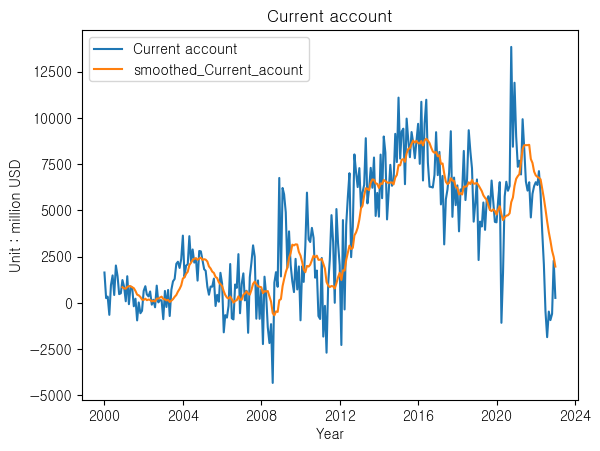

In [58]:
# your code here
plt.plot(large_df['current_account'], label = 'Current account')
plt.plot(large_df['current_account_smoothe'], label = 'smoothed_Current_acount')
plt.xlabel('Year')
plt.ylabel('Unit : million USD')
plt.legend()
plt.title('Current account')
plt.show()

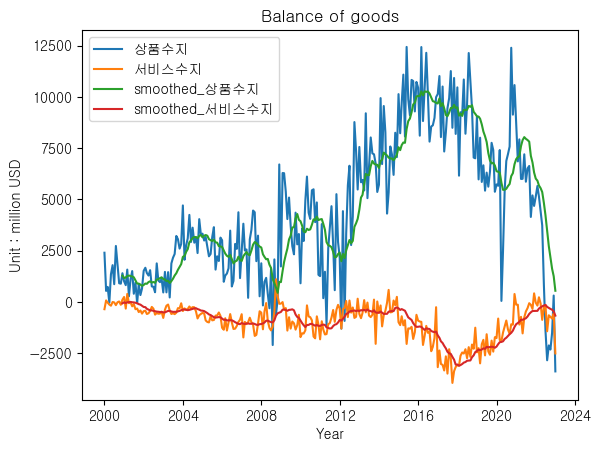

In [60]:
# your code here
plt.plot(large_df['상품수지'], label = '상품수지')
plt.plot(large_df['서비스수지'], label = '서비스수지')
plt.plot(large_df['balance_of_goods'], label = 'smoothed_상품수지')
plt.plot(large_df['balance_of_services'], label = 'smoothed_서비스수지')
plt.xlabel('Year')
plt.ylabel('Unit : million USD')
plt.legend()
plt.title('Balance of goods')
plt.show()

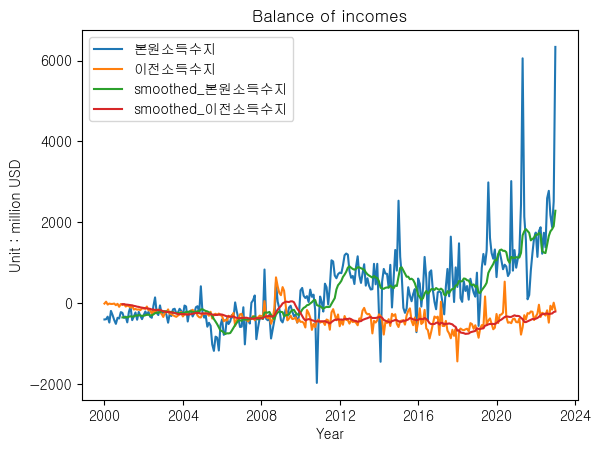

In [64]:
# your code here
plt.plot(large_df['본원소득수지'], label = '본원소득수지')
plt.plot(large_df['이전소득수지'], label = '이전소득수지')
plt.plot(large_df['balance_of_primary_income'], label = 'smoothed_본원소득수지')
plt.plot(large_df['balance_of_secondary_income'], label = 'smoothed_이전소득수지')
plt.xlabel('Year')
plt.ylabel('Unit : million USD')
plt.legend()
plt.title('Balance of incomes')
plt.show()

## Q8. Statistical analysis

We want to conduct some statistical analysis on our data set. Some data are missing in some early months of the sample period. There was the global financial crisis in 2008 which had impacted the economy seriously. Also the pandemic shcok hit the economy so that irregular swings had occurred in several variables. We will consider these factors on our analysis.


#### Q8-1. Do the following.
- Restrict the sample period to 2001.01 to 2019.12.
- Show summary statistics of all variables.
- Compute the correlation coefficients across all variables.


In [74]:
# your code here
sample_df=large_df[12:-38];sample_df

,기준금리,3년만기국고채수익률,AA-,BBB-,상품수지,서비스수지,본원소득수지,이전소득수지,대원화미달러,대원화엔,...,current_account,change_foreign_reserves,consumer_price_index,house_price_index,jeonse_price_index,balance_of_goods,balance_of_services,balance_of_primary_income,balance_of_secondary_income,current_account_smoothe
Month,,,,,,,,,,,,,,,,,,,,,
2001-01-01,5.25,5.990,7.760,11.650,1007.1,240.4,-357.1,-20.3,1272.82,1088.93,...,870.1,-0.811035,3.439221,0.000000,9.845529,1166.675000,-20.816667,-342.725000,-19.200000,783.933333
2001-02-01,5.00,5.430,6.790,11.640,817.6,-325.6,-326.6,-77.7,1252.44,1078.01,...,87.7,-0.087986,3.626670,-0.104696,9.288070,1190.258333,-54.033333,-337.350000,-29.191667,769.683333
2001-03-01,5.00,5.840,7.160,12.060,1576.3,388.4,-468.7,-52.7,1288.43,1061.62,...,1443.3,-0.933062,4.011944,0.104254,9.449299,1260.491667,-18.716667,-349.133333,-31.191667,861.450000
2001-04-01,5.00,6.590,7.910,12.620,271.8,-63.2,-208.3,-69.6,1325.55,1071.00,...,-69.3,-1.021993,4.833437,0.632493,9.419672,1286.416667,-13.141667,-327.091667,-36.691667,909.491667
2001-05-01,5.00,6.460,7.700,12.240,1089.8,-24.1,-80.1,-105.5,1298.46,1065.38,...,880.1,0.165878,5.263411,1.474814,10.408419,1265.025000,0.291667,-318.350000,-44.350000,902.616667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,1.50,1.164,1.689,7.791,5622.6,-2417.5,2988.8,-423.5,1208.98,1137.45,...,5770.4,-0.404118,-0.037200,1.384145,-0.489727,7261.108333,-2211.033333,751.650000,-516.958333,5284.766667
2019-09-01,1.50,1.287,1.792,7.894,6364.8,-2579.7,1618.9,-370.6,1197.55,1115.69,...,5033.4,0.457458,-0.426058,0.450576,-0.665867,6896.458333,-2202.558333,835.850000,-507.250000,5022.500000
2019-10-01,1.25,1.357,1.861,7.970,7761.4,-1888.2,1243.8,-499.0,1184.13,1094.19,...,6618.0,0.744791,0.000000,-0.016316,-0.710556,6756.700000,-2186.650000,904.375000,-506.275000,4968.150000


In [75]:
# your code here
sample_df.describe()

,기준금리,3년만기국고채수익률,AA-,BBB-,상품수지,서비스수지,본원소득수지,이전소득수지,대원화미달러,대원화엔,...,current_account,change_foreign_reserves,consumer_price_index,house_price_index,jeonse_price_index,balance_of_goods,balance_of_services,balance_of_primary_income,balance_of_secondary_income,current_account_smoothe
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,2.950658,3.594259,4.324136,9.270254,4673.441228,-1027.723246,114.329825,-358.609211,1126.014123,1076.406053,...,3401.438596,0.650293,2.427907,3.884556,4.195156,4550.324854,-976.716594,73.434539,-347.689985,3299.352814
std,1.214827,1.443728,1.718281,1.228693,3433.719192,878.941794,642.980998,229.577607,104.914220,184.650541,...,3317.591514,1.650956,1.277337,4.330509,5.085730,3134.118008,751.010158,444.710345,168.447464,2928.992222
min,1.250000,1.164000,1.645000,7.720000,-2103.600000,-3952.400000,-1963.800000,-1432.100000,915.860000,755.570000,...,-4327.200000,-11.440218,-0.426058,-2.469901,-5.351737,442.883333,-3114.333333,-755.883333,-752.325000,-669.558333
25%,1.750000,2.186250,2.743000,8.337750,1841.075000,-1407.925000,-320.250000,-482.925000,1066.362500,974.205000,...,726.375000,-0.045900,1.421610,1.296273,0.450889,2188.391667,-1161.379167,-276.883333,-441.731250,741.306250
50%,3.000000,3.695000,4.405000,8.866500,3853.400000,-787.700000,-50.850000,-355.100000,1130.560000,1026.175000,...,2484.650000,0.459572,2.391847,2.655557,3.668134,3195.825000,-771.275000,-94.987500,-365.737500,2318.741667
75%,4.000000,4.822500,5.500000,10.102500,7370.700000,-433.025000,510.100000,-248.100000,1180.337500,1138.615000,...,6217.725000,1.283255,3.379559,5.058583,6.137737,7220.927083,-433.987500,438.756250,-252.306250,6367.262500
max,5.250000,6.590000,8.560000,12.620000,12440.400000,1108.000000,2988.800000,643.700000,1461.980000,1546.110000,...,11101.500000,7.967986,5.903960,17.676755,19.314590,10272.566667,0.291667,1071.341667,51.083333,8876.666667


In [76]:
# your code here
sample_df.corr()

,기준금리,3년만기국고채수익률,AA-,BBB-,상품수지,서비스수지,본원소득수지,이전소득수지,대원화미달러,대원화엔,...,current_account,change_foreign_reserves,consumer_price_index,house_price_index,jeonse_price_index,balance_of_goods,balance_of_services,balance_of_primary_income,balance_of_secondary_income,current_account_smoothe
기준금리,1.000000,0.902960,0.823368,0.234284,-0.807752,0.552294,-0.470635,0.454750,-0.177884,-0.251188,...,-0.749450,0.005940,0.680902,0.511415,0.335882,-0.848269,0.534950,-0.675056,0.531438,-0.842442
3년만기국고채수익률,0.902960,1.000000,0.952427,0.526533,-0.839670,0.523530,-0.577791,0.487501,0.013960,-0.132808,...,-0.808608,0.101921,0.722507,0.526877,0.386094,-0.895282,0.549779,-0.796496,0.692755,-0.898107
AA-,0.823368,0.952427,1.000000,0.676622,-0.813351,0.538542,-0.544968,0.591608,0.206858,0.047263,...,-0.763824,0.038584,0.776144,0.453089,0.353275,-0.894542,0.536367,-0.769107,0.747694,-0.893436
BBB-,0.234284,0.526533,0.676622,1.000000,-0.453499,0.343082,-0.219074,0.409141,0.607708,0.587014,...,-0.392626,0.058562,0.568488,0.088467,0.394039,-0.529960,0.347687,-0.344130,0.598644,-0.495747
상품수지,-0.807752,-0.839670,-0.813351,-0.453499,1.000000,-0.489439,0.405983,-0.473364,-0.014763,-0.055156,...,0.951261,-0.074999,-0.709699,-0.419880,-0.318513,0.885917,-0.487589,0.679997,-0.589171,0.892301
서비스수지,0.552294,0.523530,0.538542,0.343082,-0.489439,1.000000,-0.238365,0.582964,0.187033,0.185198,...,-0.247494,-0.037671,0.407641,0.189945,0.281788,-0.637224,0.832257,-0.270812,0.614108,-0.474255
본원소득수지,-0.470635,-0.577791,-0.544968,-0.219074,0.405983,-0.238365,1.000000,-0.273011,0.071108,0.267767,...,0.531960,-0.138927,-0.429573,-0.247795,-0.025473,0.438210,-0.307469,0.703487,-0.458350,0.470513
이전소득수지,0.454750,0.487501,0.591608,0.409141,-0.473364,0.582964,-0.273011,1.000000,0.406041,0.141133,...,-0.319198,-0.173843,0.470214,0.204310,0.162856,-0.562650,0.564907,-0.395452,0.647383,-0.480019
대원화미달러,-0.177884,0.013960,0.206858,0.607708,-0.014763,0.187033,0.071108,0.406041,1.000000,0.535656,...,0.076150,0.003768,0.172203,0.066156,0.215167,-0.106749,0.199497,0.061543,0.441894,-0.028315
대원화엔,-0.251188,-0.132808,0.047263,0.587014,-0.055156,0.185198,0.267767,0.141133,0.535656,1.000000,...,0.053641,-0.021690,0.224626,-0.248657,0.141040,-0.140960,0.117012,0.264936,0.125042,-0.073413


#### Q8-2. Do the following to split the sample into two subsaples, i.e., before and after of the global financial crisis. 

  - Create a new variable to identify whether the month is before or after 2009.01 that we assume the critical month to separate the dataset.
  - Split the dataset using `groupby` with the variable that you created above.
  - Show the sample sizes of the two subgroups.


In [90]:
# your code here
before_crisis=True
indexlst=[]
for i in list(sample_df.index):
    if str(i).startswith('2009-09-01'):
        before_crisis=False
    indexlst.append(before_crisis)

In [106]:
# your code here

sample_df['before_crisis']=indexlst;sample_df
#해당 열을 기준으로 데이터 그룹화
grouped = sample_df.groupby('before_crisis')

# 그룹화된 데이터를 변수로 저장
group_before_crisis = grouped.get_group(True)
group_after_crisis = grouped.get_group(False)

print(group_before_crisis.head())
print(group_after_crisis.head())

            기준금리  3년만기국고채수익률   AA-   BBB-    상품수지  서비스수지  본원소득수지  이전소득수지  \
Month                                                                      
2001-01-01  5.25        5.99  7.76  11.65  1007.1  240.4  -357.1   -20.3   
2001-02-01  5.00        5.43  6.79  11.64   817.6 -325.6  -326.6   -77.7   
2001-03-01  5.00        5.84  7.16  12.06  1576.3  388.4  -468.7   -52.7   
2001-04-01  5.00        6.59  7.91  12.62   271.8  -63.2  -208.3   -69.6   
2001-05-01  5.00        6.46  7.70  12.24  1089.8  -24.1   -80.1  -105.5   

             대원화미달러     대원화엔  ...  change_foreign_reserves  \
Month                         ...                            
2001-01-01  1272.82  1088.93  ...                -0.811035   
2001-02-01  1252.44  1078.01  ...                -0.087986   
2001-03-01  1288.43  1061.62  ...                -0.933062   
2001-04-01  1325.55  1071.00  ...                -1.021993   
2001-05-01  1298.46  1065.38  ...                 0.165878   

            consumer_price_index

C:\Users\Taewan\AppData\Local\Temp\ipykernel_32308\2384922642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['before_crisis']=indexlst;sample_df


In [113]:
# your code here
print(group_before_crisis.shape)
print(group_after_crisis.shape)

#금융위기전 104개 데이터, 금융위기 후 124개의 데이터 존재

(104, 23)
(124, 23)


#### Q8-3. Conduct the following statistical analysis on each subgroup.

  - Show the values at 75% quantile of all variables for each subgroup of the dataset.
  - Compute the correlation coefficients across all variables for each subgroup.
  - for each group, find the variable that is most closely related (positively or negatively) with the BOK base rate
  - for each group, find the variable that is most closely related (positively or negatively) with the USD exchange rate
  - for each group, find the variable that is most closely related (positively or negatively) with the house price inflatioin rate


In [122]:
# your code here
grouped.quantile(0.75)

,기준금리,3년만기국고채수익률,AA-,BBB-,상품수지,서비스수지,본원소득수지,이전소득수지,대원화미달러,대원화엔,...,current_account,change_foreign_reserves,consumer_price_index,house_price_index,jeonse_price_index,balance_of_goods,balance_of_services,balance_of_primary_income,balance_of_secondary_income,current_account_smoothe
before_crisis,,,,,,,,,,,,,,,,,,,,,
False,2.5,3.3075,4.1400,9.9750,9215.4,-628.625,811.725,-365.750,1154.5650,1304.525,...,7480.075,0.756298,2.443674,3.154819,6.112518,9295.054167,-525.254167,644.808333,-391.564583,6751.931250
True,4.5,5.3700,6.6025,10.6525,3111.6,-327.400,-193.675,-163.325,1254.0075,1059.505,...,1891.700,1.876886,3.751487,9.369136,6.496196,2711.035417,-378.447917,-215.735417,-146.504167,1324.902083


In [123]:
# your code here
grouped.corr()

기준금리  3년만기국고채수익률       AA-  \
before_crisis                                                               
False         기준금리                         1.000000    0.736238  0.679205   
              3년만기국고채수익률                   0.736238    1.000000  0.990891   
              AA-                          0.679205    0.990891  1.000000   
              BBB-                         0.543680    0.947704  0.977814   
              상품수지                        -0.693978   -0.743686 -0.756128   
              서비스수지                        0.656816    0.444395  0.372079   
              본원소득수지                       0.059061   -0.221411 -0.229191   
              이전소득수지                       0.284915    0.178556  0.147991   
              대원화미달러                      -0.312170   -0.115641 -0.033964   
              대원화엔                         0.738623    0.743528  0.768248   
              credit_spread               -0.680427   -0.265338 -0.167063   
              change_rate_kospi           -0.036328    0.032422  0.051695   
              current_account             -0.477800   -0.668782 -0.709928   
              change_foreign_reserves      0.100377    0.293921  0.304748   
              consumer_price_index         0.589688    0.746466  0.769773   
              house_price_index            0.273268    0.158449  0.183959   
              jeonse_price_index           0.771237    0.626479  0.593620   
              balance_of_goods            -0.857913   -0.859731 -0.847960   
              balance_of_services          0.584612    0.432465  0.350663   
              balance_of_primary_income   -0.002223   -0.459285 -0.520183   
              balance_of_secondary_income  0.356043    0.516841  0.495559   
              current_account_smoothe     -0.727821   -0.835105 -0.859715   
True          기준금리                         1.000000    0.723556  0.358761   
              3년만기국고채수익률                   0.723556    1.000000  0.692722   
              AA-                          0.358761    0.692722  1.000000   
              BBB-                        -0.236320    0.294658  0.737345   
              상품수지                        -0.573156   -0.548022 -0.359982   
              서비스수지                       -0.049412    0.067494  0.419212   
              본원소득수지                       0.018912   -0.032088  0.131504   
              이전소득수지                      -0.177565    0.005684  0.569675   
              대원화미달러                      -0.355042    0.055018  0.521733   
              대원화엔                        -0.597767   -0.305393  0.366836   
              credit_spread               -0.752436   -0.341730 -0.031705   
              change_rate_kospi           -0.241593   -0.122359 -0.156534   
              current_account             -0.558794   -0.492001 -0.129316   
              change_foreign_reserves     -0.354288   -0.283834 -0.427686   
              consumer_price_index         0.269505    0.154871  0.430596   
              house_price_index            0.363542    0.519160  0.263153   
              jeonse_price_index           0.453373    0.778464  0.607512   
              balance_of_goods            -0.338732   -0.516116 -0.718617   
              balance_of_services         -0.317368   -0.021159  0.218948   
              balance_of_primary_income   -0.220836   -0.227727  0.049810   
              balance_of_secondary_income -0.462609    0.008810  0.407418   
              current_account_smoothe     -0.576192   -0.574213 -0.580290   

                                               BBB-      상품수지     서비스수지  \
before_crisis                                                             
False         기준금리                         0.543680 -0.693978  0.656816   
              3년만기국고채수익률                   0.947704 -0.743686  0.444395   
              AA-                          0.977814 -0.756128  0.372079   
              BBB-                         1.000000 -0.723105  0.215616   
              상품수지                        -0.723105  1

In [171]:
# your code here
group_before_crisis.corr()['기준금리'][abs(group_before_crisis.corr()['기준금리']).rank(ascending=False)==2]

credit_spread   -0.752436
Name: 기준금리, dtype: float64

In [172]:
group_after_crisis.corr()['기준금리'][abs(group_after_crisis.corr()['기준금리']).rank(ascending=False)==2]

balance_of_goods   -0.857913
Name: 기준금리, dtype: float64

In [174]:
# your code here
group_before_crisis.corr()['대원화미달러'][abs(group_before_crisis.corr()['대원화미달러']).rank(ascending=False)==2]

balance_of_secondary_income    0.876813
Name: 대원화미달러, dtype: float64

In [180]:
group_after_crisis.corr()['대원화미달러'][abs(group_after_crisis.corr()['대원화미달러']).rank(ascending=False)==2]

credit_spread    0.32602
Name: 대원화미달러, dtype: float64

In [181]:
# your code here
group_before_crisis.corr()['house_price_index'][abs(group_before_crisis.corr()['house_price_index']).rank(ascending=False)==2]


jeonse_price_index    0.719778
Name: house_price_index, dtype: float64

In [182]:
group_after_crisis.corr()['house_price_index'][abs(group_after_crisis.corr()['house_price_index']).rank(ascending=False)==2]

jeonse_price_index    0.653234
Name: house_price_index, dtype: float64